In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Telecom_Churn_Data.csv")
print("First 5 records:")
print(df.head())

First 5 records:
   Customer_ID  Monthly_Charges  Total_Charges  Tenure   Contract_Type  \
0            1             45.5           2000      40        Two year   
1            2             70.0           1500      20        One year   
2            3             55.0           2200      45        Two year   
3            4             80.0            900      12  Month-to-month   
4            5             60.0           2500      50        Two year   

   Support_Calls Churn  
0              1    No  
1              3   Yes  
2              2    No  
3              5   Yes  
4              1    No  


In [3]:
# Step 3: Data Preprocessing
df = df.dropna()

# Encode categorical column 'Contract_Type'
df["Contract_Type"] = LabelEncoder().fit_transform(df["Contract_Type"])
# (Month-to-month = 2, One year = 1, Two year = 0)

# Encode target 'Churn' (No=0, Yes=1)
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# Define features and target
X = df[["Monthly_Charges", "Total_Charges", "Tenure", "Contract_Type", "Support_Calls"]]
y = df["Churn"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predict on Test Data
y_pred = model.predict(X_test)

# Step 7: Evaluate Model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Accuracy: 1.0


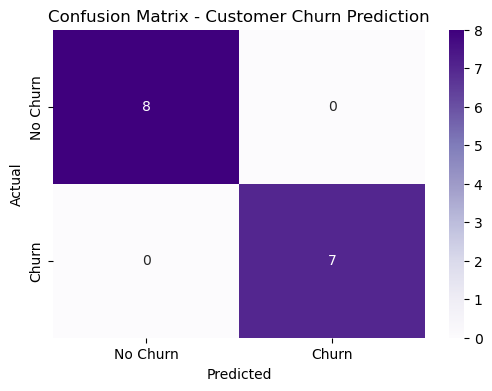

In [5]:
# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Customer Churn Prediction")
plt.show()

In [6]:
# Step 9: Predict Churn Probability for a New Customer
new_customer = pd.DataFrame({
    "Monthly_Charges": [85],
    "Total_Charges": [950],
    "Tenure": [10],
    "Contract_Type": [2],   # Month-to-month
    "Support_Calls": [6]
})

new_customer_scaled = scaler.transform(new_customer)
churn_prob = model.predict_proba(new_customer_scaled)[0][1]
print(f"\nPredicted Churn Probability for the new customer: {churn_prob:.2%}")


Predicted Churn Probability for the new customer: 97.41%
